In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [78]:
# Generate data with noise
number_points = 10
true_coefficients = [10.4,5.5]
x = np.linspace(0,10,number_points)
noise = np.random.normal(size=number_points)
data = true_coefficients[0]*x + true_coefficients[1] + noise

print data

[   6.92956738   17.26884056   28.78613583   39.86254626   51.65705573
   63.29891376   74.99645819   88.09533861   97.91882193  109.78527755]


In [85]:
data = np.random.normal(1,100,size=2500)

In [86]:
# only non-pair number for variable size
size = int(raw_input('input size windows: '))

input size windows: 11


In [87]:
#fun for window ) 

def size_end(arr,size):
    size_arr = range(len(arr))
    temp = size-1
    index_arr = np.array([],dtype=np.int32)
    new_arr = np.array([],dtype=np.int32)
    # add last outing index in array 
    for i in range(temp/2):
        index_arr = np.append(index_arr,[[size_arr[:1+i]]])
        index_arr = np.append(index_arr,[[size_arr[len(arr)-temp+i:len(arr)]]])
    # make median metod with outing index
        new_arr = np.append(new_arr,np.median(arr[index_arr[:len(index_arr)]]))
        index_arr = np.array([],dtype=np.int32)
    return new_arr

def size_top(arr,size):
    size_arr = range(len(arr))
    temp = size-1
    index_arr = np.array([],dtype=np.int32)
    new_arr = np.array([],dtype=np.int32)
    for i in list(xrange(temp/2,temp)):
        index_arr = np.append(index_arr,[[size_arr[:1+i]]])
        index_arr = np.append(index_arr,[[size_arr[len(arr)-temp+i:len(arr)]]])
    # make median metod with outing index
        new_arr = np.append(new_arr,np.median(arr[index_arr[:len(index_arr)]]))
        index_arr = np.array([],dtype=np.int32)
    return new_arr[::-1]
                   
def move_window_median(arr,size):
    iterator = range(len(arr)-size+1)
    num_arr = map(lambda x: np.median(arr[x:size+x]),iterator)
    return num_arr

def move_window_median2(arr,size):
    temp = np.copy(arr)
    iterator = range(len(arr)-size+1)
    temp[size/2:len(arr)-size/2] = map(lambda x: np.median(arr[x:size+x]),iterator)[:]
    return temp

def move_window_mean(arr,size_win):
    temp = range(len(arr)-size_win+1)
    arr = np.array(map(lambda x:np.mean(arr[x:size_win+x]),temp))
    return arr

2500
2500
2500


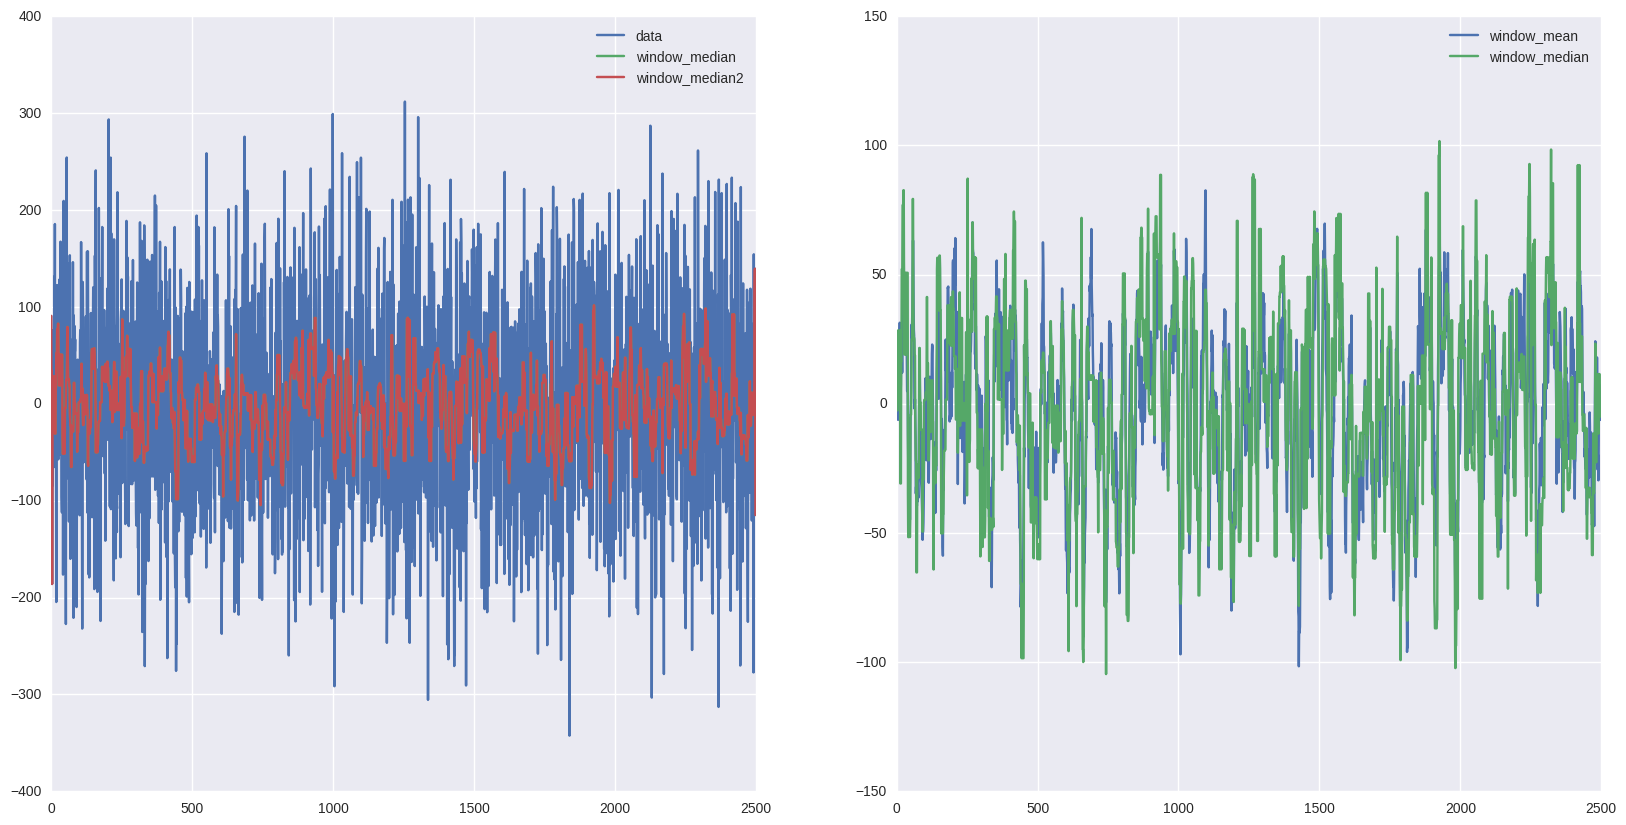

In [89]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

temp_arr = move_window_median2(data,size)

arr = move_window_mean(data,size)
arr = np.append(arr, size_end(arr,size))
arr = np.append(arr[::-1],size_top(arr,size))
arr = arr[::-1]

arr_1 = move_window_median(data,size)
arr_1 = np.append(arr_1, size_end(arr,size))
arr_1 = np.append(arr_1[::-1], size_top(arr,size))
arr_1 = arr_1[::-1]

fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
#ax3 = fig.add_subplot(1,3,3)

ax1.plot(data,label='data')
ax2.plot(arr,label='window_mean')
ax1.plot(arr_1,label='window_median')
ax2.plot(arr_1,label='window_median')
ax1.plot(temp_arr,label='window_median2')
#ax1.plot(arr, label='window_mean')

ax1.legend(loc = 'best')
ax2.legend(loc = 'best')
#ax3.legend(loc = 'best')

print len(arr)
print len(arr_1)
print len(data)

plt.show()

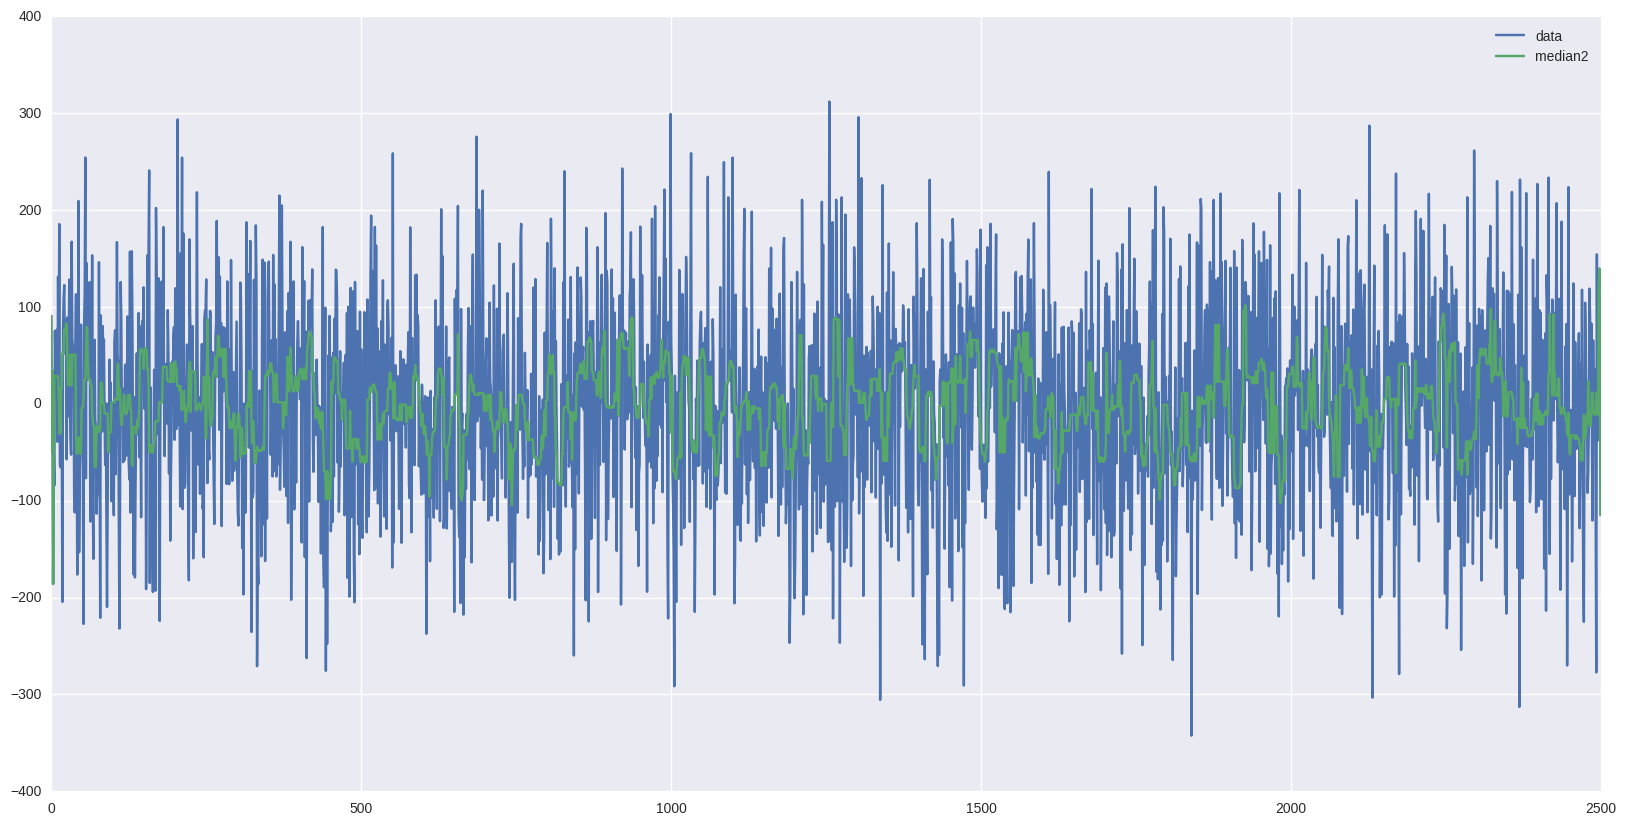

[  90.64266923  -49.68049938   34.07998074 ...,  139.43474848   32.52617707
 -114.78586191]
[  90.64266923  -49.68049938   34.07998074 ...,  139.43474848   32.52617707
 -114.78586191]
[-2.52266297 -2.52266297  3.49667721 ..., -6.21902749 -5.01331075
 -2.52266297]


In [92]:
#data test for normal fun

temp_arr = move_window_median2(data,size)

fig_2 = plt.figure()
ax4 = fig_2.add_subplot(111)

ax4.plot(data, label="data")
ax4.plot(temp_arr, label="median2")
#ax4.plot(arr_1, label = "median")

ax4.legend(loc = 'best')

plt.show()
print temp_arr
print data
print arr

In [36]:
# quick test, how it is work in def round_loop ) 


num_arr = np.array([],dtype=np.int32)
arr1 = range(40)
for i in range(4):
    if i >= 2:
        num_arr = num_arr[::-1]
        num_arr = np.append(num_arr, [[arr1[:1+i]]])
        num_arr = np.append(num_arr, [[arr1[len(arr1)-4+i:len(arr1)]]])
        num_arr = num_arr[::-1]
    else:
        num_arr = np.append(num_arr, [[arr1[:1+i]]])
        num_arr = np.append(num_arr, [[arr1[len(arr1)-4+i:len(arr1)]]])
    
#num_arr = np.array(num_arr,dtype=np.int32)
num_arr

array([39,  3,  2,  1,  0, 39, 38,  2,  1,  0,  0, 36, 37, 38, 39,  0,  1,
       37, 38, 39])

In [28]:
len(temp_arr)

1000